In [1281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

In [1282]:
file_path =  r'C:\Users\Rik\Desktop\immo-eliza-team6-analysis\analysis\clean_data.csv'

df = pd.read_csv(file_path, sep = ',')

In [1283]:
df.head(30)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5852 non-null   int64  
 1   locality_name       5852 non-null   object 
 2   Postal_code         5852 non-null   int64  
 3   Price               5852 non-null   int64  
 4   Subtype             5852 non-null   object 
 5   Number_of_bedrooms  5852 non-null   int64  
 6   Living_area         5852 non-null   int64  
 7   street              5852 non-null   object 
 8   number              5831 non-null   object 
 9   latitude            5847 non-null   float64
 10  longitude           5847 non-null   float64
 11  Open_fire           5852 non-null   int64  
 12  Swimming_Pool       5852 non-null   int64  
 13  hasTerrace          5852 non-null   int64  
 14  terraceSurface      5852 non-null   int64  
 15  gardenSurface       5852 non-null   int64  
 16  Kitche

In [1284]:
# transform 'int64' to 'Int64' to handle NaN

int_columns = df.select_dtypes(include=['int64'])

for col in int_columns.columns:
    df[col] = df[col].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5852 non-null   Int64  
 1   locality_name       5852 non-null   object 
 2   Postal_code         5852 non-null   Int64  
 3   Price               5852 non-null   Int64  
 4   Subtype             5852 non-null   object 
 5   Number_of_bedrooms  5852 non-null   Int64  
 6   Living_area         5852 non-null   Int64  
 7   street              5852 non-null   object 
 8   number              5831 non-null   object 
 9   latitude            5847 non-null   float64
 10  longitude           5847 non-null   float64
 11  Open_fire           5852 non-null   Int64  
 12  Swimming_Pool       5852 non-null   Int64  
 13  hasTerrace          5852 non-null   Int64  
 14  terraceSurface      5852 non-null   Int64  
 15  gardenSurface       5852 non-null   Int64  
 16  Kitche

In [1285]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5852 non-null   Int64   
 1   locality_name       5852 non-null   category
 2   Postal_code         5852 non-null   Int64   
 3   Price               5852 non-null   Int64   
 4   Subtype             5852 non-null   category
 5   Number_of_bedrooms  5852 non-null   Int64   
 6   Living_area         5852 non-null   Int64   
 7   street              5852 non-null   category
 8   number              5831 non-null   category
 9   latitude            5847 non-null   float64 
 10  longitude           5847 non-null   float64 
 11  Open_fire           5852 non-null   Int64   
 12  Swimming_Pool       5852 non-null   Int64   
 13  hasTerrace          5852 non-null   Int64   
 14  terraceSurface      5852 non-null   Int64   
 15  gardenSurface       5852 non-null   In

In [1286]:
#Getting an idea of the values in columns with dtype 'category'
pd.set_option('display.max_rows', 30)

for col in df.select_dtypes(include=['category']).columns:
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    unique_count = df[col].nunique()
    print("\n")
    print(f"Number of unique entries in {col}: {unique_count}\n")

Counts for locality_name:
locality_name
Gent              181
Antwerpen         109
Aalst              79
Ronse              78
Geraardsbergen     65
                 ... 
Wilsele             1
Winksele            1
Wodecq              1
Woesten             1
Wommersom           1
Name: count, Length: 1172, dtype: int64


Number of unique entries in locality_name: 1172

Counts for Subtype:
Subtype
House              5101
Villa               411
Town house           99
Bungalow             79
Mansion              72
Country cottage      52
Farmhouse            23
Chalet               13
Manor house           2
Name: count, dtype: int64


Number of unique entries in Subtype: 9

Counts for street:
street
Stationsstraat         36
Molenstraat            35
Kerkstraat             25
Hoogstraat             18
Veldstraat             17
                       ..
Boterhoek               1
Zwartkloosterstraat     1
Zwevegemsestraat        1
Botermelkstraat         1
Sterrebos               1
Nam

**POSTAL_CODE**

In [1287]:
#Converting the postal codes to dtype 'str'

df['Postal_code'] = df['Postal_code'].astype(str)

In [1288]:
#Check the missing values
df['Postal_code'].isnull().mean()*100

np.float64(0.0)

In [1289]:
#Asses the number of unique postal codes

unique_postal = df['Postal_code'].value_counts().nunique()

unique_postal



51

In [1290]:
#dropping a dutch postal code

df = df[df['Postal_code'] != '4524 JM']


In [1291]:
#Assess the frequency

frequency = df['Postal_code'].value_counts()

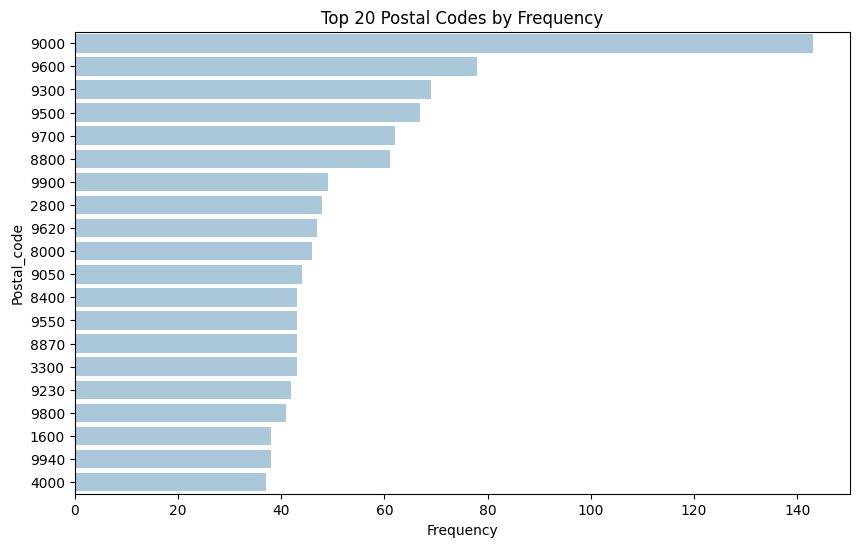

In [1292]:
#Showing the top 20 

top_n = 20 

# Plotting only the top N categories
top_n_categories = frequency.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_categories.values, y=top_n_categories.index, color='#A3C9E2')
plt.title(f'Top {top_n} Postal Codes by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Postal_code')
plt.show()

In [1293]:
#Aggregate Postal code by price
Postal_aggregates = df.groupby('Postal_code').agg({'Price': ['mean', 'median']}).reset_index()


**PROVINCE**

Create a column to assign the properties to a province

In [1294]:
#creating the column province

def get_province(postal_code):
    if postal_code.startswith('1'):
        return 'Brussels' if int(postal_code) < 1300 else 'Brabant_Wallon'
    elif postal_code.startswith('2'):
        return 'Antwerp'
    elif postal_code.startswith('4'):
        return 'Liège'
    elif postal_code.startswith('5'):
        return 'Namur'
    elif postal_code.startswith('6'):
        return 'Luxembourg'
    elif postal_code.startswith('7'):
        return 'Hainaut'
    elif postal_code.startswith('8'):
        return 'West Flanders'
    elif postal_code.startswith('9'):
        return 'East Flanders'
    elif postal_code.startswith('3'):
        return 'Flemish Brabant' if int(postal_code) < 3500 else 'Limburg'
    else:
        return None 

df['Province'] = df['Postal_code'].apply(get_province).copy()

#Assigning the dtypes
df['Province'] = df['Province'].astype('category')
df['Postal_code'] = df['Postal_code'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5852 non-null   Int64   
 1   locality_name       5852 non-null   category
 2   Postal_code         5852 non-null   object  
 3   Price               5852 non-null   Int64   
 4   Subtype             5852 non-null   category
 5   Number_of_bedrooms  5852 non-null   Int64   
 6   Living_area         5852 non-null   Int64   
 7   street              5852 non-null   category
 8   number              5831 non-null   category
 9   latitude            5847 non-null   float64 
 10  longitude           5847 non-null   float64 
 11  Open_fire           5852 non-null   Int64   
 12  Swimming_Pool       5852 non-null   Int64   
 13  hasTerrace          5852 non-null   Int64   
 14  terraceSurface      5852 non-null   Int64   
 15  gardenSurface       5852 non-null   In

In [1295]:
#Assess the frequency

frequency = df['Province'].value_counts()
frequency

Province
East Flanders      1766
West Flanders      1032
Antwerp             885
Brabant_Wallon      567
Liège               449
Luxembourg          327
Flemish Brabant     282
Brussels            160
Namur               142
Limburg             123
Hainaut             119
Name: count, dtype: int64

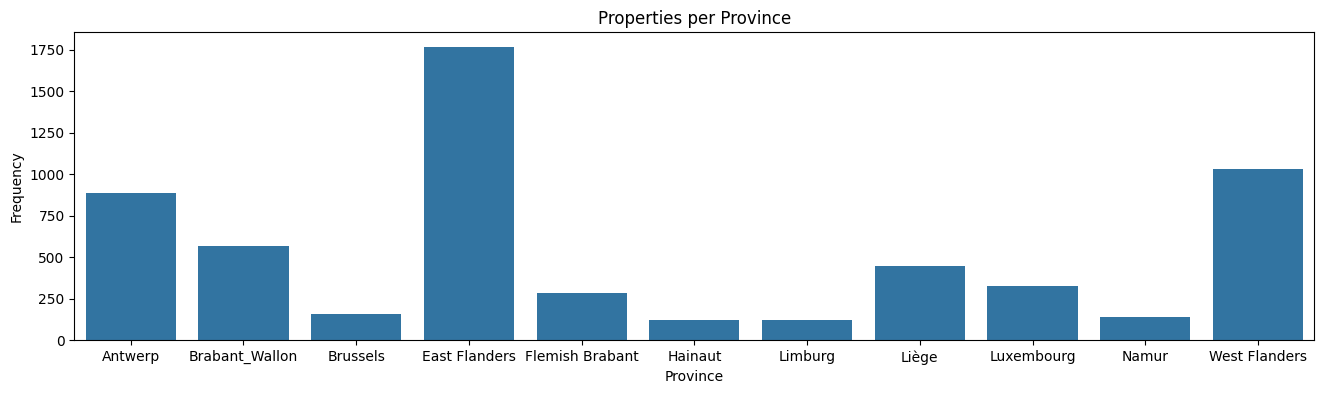

In [1296]:
#Plotting the frequency

plt.figure(figsize=(16, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Properties per Province')
plt.xlabel('Province')
plt.ylabel('Frequency')
plt.show()

**ASSIGNED CITY**

Create a column with all properties in the vicinity (10k) of one of the 10 biggest cities

In [1297]:
#creating a column for proximity to the 10 main Belgian cities:
cities_data = {'City': ['Brussels', 'Antwerp', 'Ghent', 'Bruges', 'Liège','Namur', 'Leuven', 'Mons', 'Aalst', 'Sint-Niklaas'],
               'Latitude': [50.8503, 51.2211, 51.0543, 51.2093, 50.6050, 50.4674, 50.8798, 50.4542, 50.9403, 51.1449],
               'Longitude': [4.3517, 4.4120, 3.7174, 3.2240, 5.5797, 4.8712, 4.7033, 3.9514, 4.0364, 4.1525],
               'Radius': [10 for x in range(10)]}

cities_df = pd.DataFrame(cities_data)

cities_df.head(10)


,City,Latitude,Longitude,Radius
0,Brussels,50.8503,4.3517,10
1,Antwerp,51.2211,4.4120,10
2,Ghent,51.0543,3.7174,10
3,Bruges,51.2093,3.2240,10
4,Liège,50.6050,5.5797,10
5,Namur,50.4674,4.8712,10
6,Leuven,50.8798,4.7033,10
7,Mons,50.4542,3.9514,10
8,Aalst,50.9403,4.0364,10
9,Sint-Niklaas,51.1449,4.1525,10


In [1298]:
#Make a geodataframe from the cities dataframe
cities_gdf = gpd.GeoDataFrame(cities_df,geometry=gpd.points_from_xy(cities_df.Longitude, cities_df.Latitude))

In [1299]:
#Creating the buffer/radius zone (set on 10km)

cities_gdf['buffer'] = cities_gdf.geometry.buffer(cities_gdf['Radius'] / 111)
cities_gdf = cities_gdf.set_geometry('buffer')




In [1300]:
print(cities_gdf)

           City  Latitude  Longitude  Radius                geometry  \
0      Brussels   50.8503     4.3517      10  POINT (4.3517 50.8503)   
1       Antwerp   51.2211     4.4120      10   POINT (4.412 51.2211)   
2         Ghent   51.0543     3.7174      10  POINT (3.7174 51.0543)   
3        Bruges   51.2093     3.2240      10   POINT (3.224 51.2093)   
4         Liège   50.6050     5.5797      10   POINT (5.5797 50.605)   
5         Namur   50.4674     4.8712      10  POINT (4.8712 50.4674)   
6        Leuven   50.8798     4.7033      10  POINT (4.7033 50.8798)   
7          Mons   50.4542     3.9514      10  POINT (3.9514 50.4542)   
8         Aalst   50.9403     4.0364      10  POINT (4.0364 50.9403)   
9  Sint-Niklaas   51.1449     4.1525      10  POINT (4.1525 51.1449)   

                                              buffer  
0  POLYGON ((4.44179 50.8503, 4.44136 50.84147, 4...  
1  POLYGON ((4.50209 51.2211, 4.50166 51.21227, 4...  
2  POLYGON ((3.80749 51.0543, 3.80706 51.0

In [1301]:
cities_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   City       10 non-null     object  
 1   Latitude   10 non-null     float64 
 2   Longitude  10 non-null     float64 
 3   Radius     10 non-null     int64   
 4   geometry   10 non-null     geometry
 5   buffer     10 non-null     geometry
dtypes: float64(2), geometry(2), int64(1), object(1)
memory usage: 612.0+ bytes


In [1302]:
#checking and slicing original data and creating a new dataframe house_geo
house_geo= pd.DataFrame(df[['id', 'latitude', 'longitude']]).copy()

house_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5852 non-null   Int64  
 1   latitude   5847 non-null   float64
 2   longitude  5847 non-null   float64
dtypes: Int64(1), float64(2)
memory usage: 143.0 KB


In [1303]:
#Making a geo dataframe from the dataframe
house_geo_gdf = gpd.GeoDataFrame(house_geo,geometry=gpd.points_from_xy(house_geo.longitude, house_geo.latitude))

house_geo_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         5852 non-null   Int64   
 1   latitude   5847 non-null   float64 
 2   longitude  5847 non-null   float64 
 3   geometry   5852 non-null   geometry
dtypes: Int64(1), float64(2), geometry(1)
memory usage: 188.7 KB


In [1304]:
joined_gdf = gpd.sjoin(house_geo_gdf, cities_gdf[['City', 'buffer']], how='left', predicate='intersects', lsuffix='_house', rsuffix='_city')


In [1305]:
house_geo_gdf['Assigned_City'] = joined_gdf['City']
house_geo_gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             5852 non-null   Int64   
 1   latitude       5847 non-null   float64 
 2   longitude      5847 non-null   float64 
 3   geometry       5852 non-null   geometry
 4   Assigned_City  1586 non-null   object  
dtypes: Int64(1), float64(2), geometry(1), object(1)
memory usage: 234.4+ KB


In [1306]:

#Slicing and checking
check_city = house_geo_gdf[house_geo_gdf['Assigned_City'].notna()]
print(check_city)

check_city.info()


            id   latitude  longitude                  geometry Assigned_City
6     20248858  50.839333   4.430145  POINT (4.43014 50.83933)      Brussels
8     20250831  51.177267   4.375369  POINT (4.37537 51.17727)       Antwerp
12    20246399  51.252498   4.456992   POINT (4.45699 51.2525)       Antwerp
15    20221782  51.203166   4.462397   POINT (4.4624 51.20317)       Antwerp
16    20236558  51.212485   4.429373  POINT (4.42937 51.21249)       Antwerp
...        ...        ...        ...                       ...           ...
5831  20191767  50.947855   4.031744  POINT (4.03174 50.94785)         Aalst
5834  20176735  51.053502   3.754882   POINT (3.75488 51.0535)         Ghent
5836  20192342  50.585528   5.517862  POINT (5.51786 50.58553)         Liège
5837  20205927  50.590662   5.499791  POINT (5.49979 50.59066)         Liège
5839  20208641  51.222408   4.440489  POINT (4.44049 51.22241)       Antwerp

[1586 rows x 5 columns]
<class 'geopandas.geodataframe.GeoDataFrame'>
Index

In [1307]:
#Merge the assigned city column to the main dataframe

df = pd.merge(df, house_geo_gdf[['id', 'Assigned_City']], on='id', how='left')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5852 non-null   Int64   
 1   locality_name       5852 non-null   category
 2   Postal_code         5852 non-null   object  
 3   Price               5852 non-null   Int64   
 4   Subtype             5852 non-null   category
 5   Number_of_bedrooms  5852 non-null   Int64   
 6   Living_area         5852 non-null   Int64   
 7   street              5852 non-null   category
 8   number              5831 non-null   category
 9   latitude            5847 non-null   float64 
 10  longitude           5847 non-null   float64 
 11  Open_fire           5852 non-null   Int64   
 12  Swimming_Pool       5852 non-null   Int64   
 13  hasTerrace          5852 non-null   Int64   
 14  terraceSurface      5852 non-null   Int64   
 15  gardenSurface       5852 non-null   In

**GEO-MAPPING**

In [1308]:
df.head(10)

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,...,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,price_per_sqm,Province,Assigned_City
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,...,0,370,NaN,4,To renovate,0,F,2552.000000,East Flanders,NaN
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,...,0,895,Installed,2,Good,0,D,1796.401198,East Flanders,NaN
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,...,10,20,Semi equipped,2,To renovate,0,E,1785.714286,Antwerp,NaN
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,...,0,300,NaN,3,To renovate,0,F,1715.116279,Brabant_Wallon,NaN
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,...,40,32,Installed,3,Good,0,C,1600.000000,Brabant_Wallon,NaN
5,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,...,36,374,NaN,3,As new,0,C,2553.571429,Brabant_Wallon,NaN
6,20248858,Woluwe-Saint-Lambert,1200,790000,House,5,349,Rue De La Cambre - Terkamerenstraat,296,50.839333,...,14,60,Usa hyper equipped,2,Good,0,F,2263.610315,Brussels,Brussels
7,20245694,Herzele,9550,198800,House,3,125,Stationsstraat,173,50.894568,...,45,106,Semi equipped,2,To renovate,0,F,1590.400000,East Flanders,NaN
8,20250831,Wilrijk,2610,299000,House,3,132,Egied Segerslaan,42,51.177267,...,0,40,NaN,2,As new,0,D,2265.151515,Antwerp,Antwerp
9,20250541,Brecht,2960,469000,House,3,153,Cambeenbos Laan D,3,51.310017,...,0,0,Semi equipped,4,To renovate,0,D,3065.359477,Antwerp,NaN


In [1309]:
#Getting a map from folium with the coordinates of the mean lat and long of the dataframe

m = folium.Map(location = [df.latitude.mean(), df.longitude.mean()], zoom_start=7, control_scale= True)

m


In [1310]:
map_values = df[['latitude', 'longitude']].dropna()

map_data = map_values.values.tolist()

In [1311]:
for coord in map_data:
    folium.Marker(location=coord).add_to(m)
    
# m.save('map.html')
# webbrowser.open(r'C:\Users\Rik\Desktop\immo-eliza-team6-analysis\analysis\map.html')

**SUBTYPE**

In [1312]:
#Check the missing values
df['Subtype'].isnull().mean()*100

np.float64(0.0)

In [1313]:
df['Subtype'].isnull().sum()

np.int64(0)

In [1314]:
frequency = df['Subtype'].value_counts()
frequency

Subtype
House              5101
Villa               411
Town house           99
Bungalow             79
Mansion              72
Country cottage      52
Farmhouse            23
Chalet               13
Manor house           2
Name: count, dtype: int64

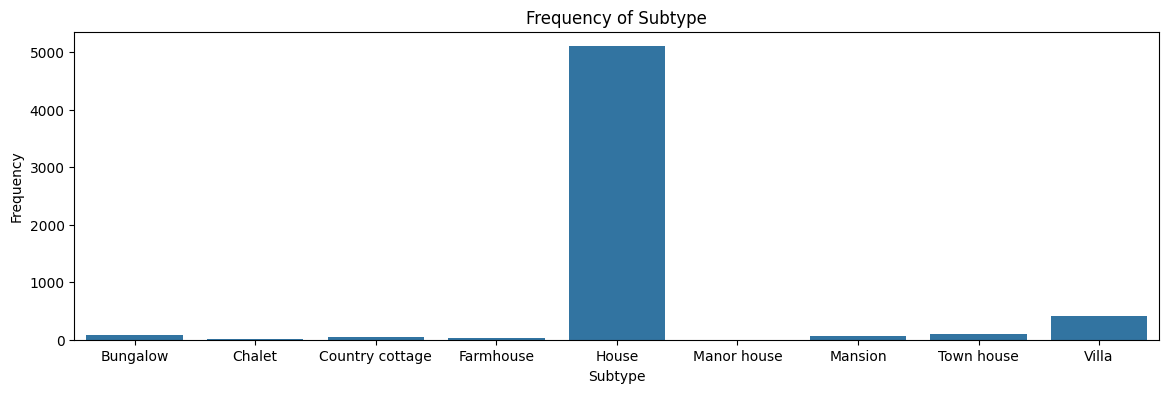

In [1315]:
#Detecting Outliers
frequency = df['Subtype'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Subtype')
plt.xlabel('Subtype')
plt.ylabel('Frequency')
plt.show()


In [1316]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['subtype', 'count']

print(frequency_df)

           subtype  count
0            House   5101
1            Villa    411
2       Town house     99
3         Bungalow     79
4          Mansion     72
5  Country cottage     52
6        Farmhouse     23
7           Chalet     13
8      Manor house      2


In [1317]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Subtype
Town house         99
Bungalow           79
Mansion            72
Country cottage    52
Farmhouse          23
Chalet             13
Manor house         2
Name: count, dtype: int64


In [1318]:
#Here we will use One-Hot Encoding (pd.get_dummies) because this is a nominal (unordered) column and the number of categories is small.
df_one_hot_subtype = pd.get_dummies(df.copy(), columns=['Subtype'], prefix='Subtype', drop_first=True)



In [1319]:
df_one_hot_subtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       5852 non-null   Int64   
 1   locality_name            5852 non-null   category
 2   Postal_code              5852 non-null   object  
 3   Price                    5852 non-null   Int64   
 4   Number_of_bedrooms       5852 non-null   Int64   
 5   Living_area              5852 non-null   Int64   
 6   street                   5852 non-null   category
 7   number                   5831 non-null   category
 8   latitude                 5847 non-null   float64 
 9   longitude                5847 non-null   float64 
 10  Open_fire                5852 non-null   Int64   
 11  Swimming_Pool            5852 non-null   Int64   
 12  hasTerrace               5852 non-null   Int64   
 13  terraceSurface           5852 non-null   Int64   
 14  gardenSu

**KITCHEN_TYPE**


In [1320]:
#Checking the missing values
df['Kitchen_type'].isnull().mean()*100

np.float64(38.24333561175666)

In [1321]:
df['Kitchen_type'].isnull().sum()
df['Kitchen_type'].head(30)

0                    NaN
1              Installed
2          Semi equipped
3                    NaN
4              Installed
5                    NaN
6     Usa hyper equipped
7          Semi equipped
8                    NaN
9          Semi equipped
10             Installed
11             Installed
12             Installed
13             Installed
14        Hyper equipped
15         Semi equipped
16        Hyper equipped
17             Installed
18             Installed
19             Installed
20                   NaN
21        Hyper equipped
22             Installed
23         Semi equipped
24             Installed
25             Installed
26         Usa installed
27        Hyper equipped
28                   NaN
29             Installed
Name: Kitchen_type, dtype: category
Categories (8, object): ['Hyper equipped', 'Installed', 'Not installed', 'Semi equipped', 'Usa hyper equipped', 'Usa installed', 'Usa semi equipped', 'Usa uninstalled']

In [1322]:
#Dealing with the high number of missing values
#df['Kitchen_type'] = df['Kitchen_type'].apply(lambda x: 'Missing' if pd.isna(x) else x)

In [1323]:
frequency = df['Kitchen_type'].value_counts()
frequency

Kitchen_type
Installed             1935
Hyper equipped         779
Semi equipped          645
Not installed          202
Usa installed           29
Usa hyper equipped      19
Usa uninstalled          4
Usa semi equipped        1
Name: count, dtype: int64

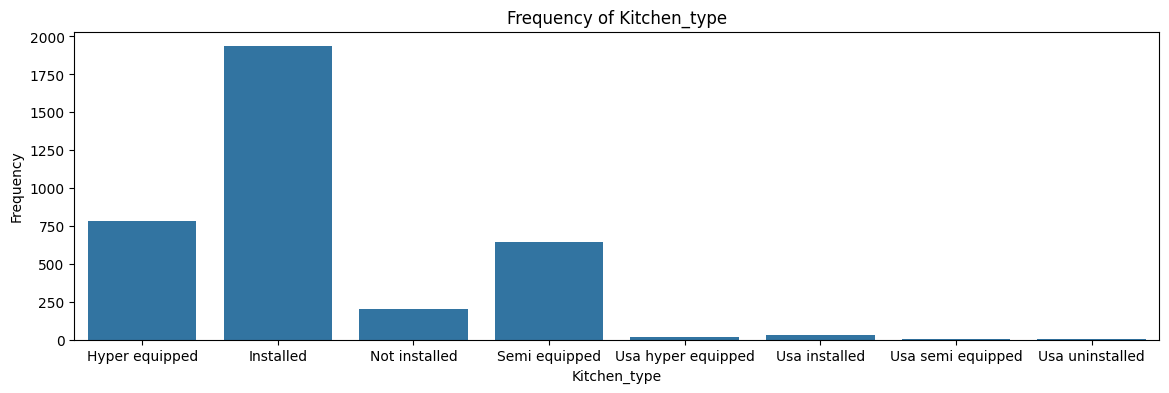

In [1324]:
#Detecting Outliers
frequency = df['Kitchen_type'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

In [1325]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['Kitchen_type', 'count']

print(frequency_df)

         Kitchen_type  count
0           Installed   1935
1      Hyper equipped    779
2       Semi equipped    645
3       Not installed    202
4       Usa installed     29
5  Usa hyper equipped     19
6     Usa uninstalled      4
7   Usa semi equipped      1


In [1326]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Kitchen_type
Not installed         202
Usa installed          29
Usa hyper equipped     19
Usa uninstalled         4
Usa semi equipped       1
Name: count, dtype: int64


**State_of_building**

In [1327]:
#Checking the missing values
df['State_of_building'].isnull().mean()*100

np.float64(9.552289815447711)

In [1328]:
df['State_of_building'].isnull().sum()

np.int64(559)

In [1329]:
frequency = df['State_of_building'].value_counts()
frequency

State_of_building
Good              2314
As new            1034
To renovate        984
To be done up      620
Just renovated     306
To restore          35
Name: count, dtype: int64

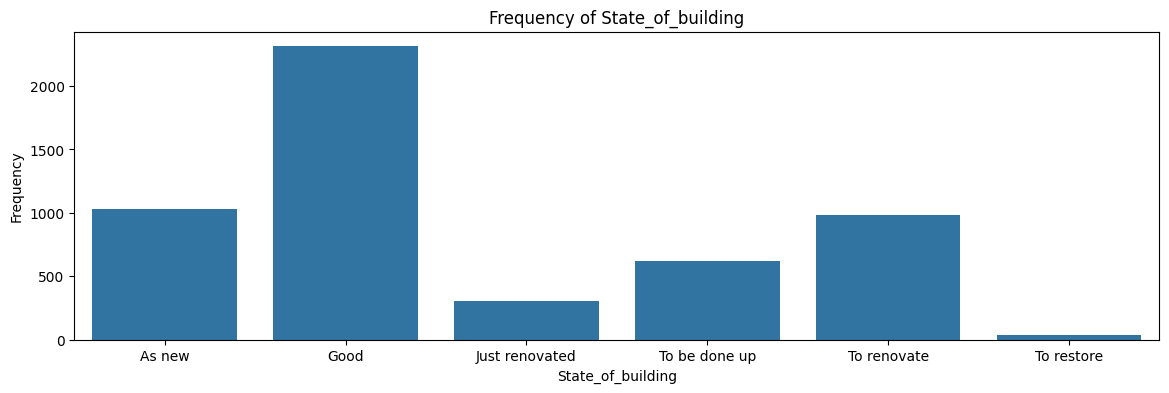

In [1330]:
#Detecting Outliers
frequency = df['State_of_building'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

In [1331]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['State_of_building', 'count']

print(frequency_df)

  State_of_building  count
0              Good   2314
1            As new   1034
2       To renovate    984
3     To be done up    620
4    Just renovated    306
5        To restore     35


In [1332]:
#Dealing with missing values (Imputation)

df['State_of_building'] = df['State_of_building'].fillna(df['State_of_building'].mode()[0])
frequency = df['State_of_building'].value_counts()
frequency

#Missing is also a possibility here???

#df['State_of_building'] = df['State_of_building'].fillna('Missing')

State_of_building
Good              2873
As new            1034
To renovate        984
To be done up      620
Just renovated     306
To restore          35
Name: count, dtype: int64

In [1333]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: State_of_building
To restore    35
Name: count, dtype: int64


In [1334]:
#Assign the rare value to another value
category_map = {'To restore': 'To renovate'}
df['State_of_building'] = df['State_of_building'].map(category_map).fillna(df['State_of_building'])

frequency = df['State_of_building'].value_counts()
frequency

State_of_building
Good              2873
As new            1034
To renovate       1019
To be done up      620
Just renovated     306
Name: count, dtype: int64

**EPC**

In [1335]:
#Checking the missing values
df['epc'].isnull().mean()*100

np.float64(4.6479835953520166)

In [1336]:
#Checking the missing values
df['epc'].isnull().sum()

np.int64(272)

In [1337]:
frequency = df['epc'].value_counts()
frequency

epc
F      1134
C      1107
D      1041
B       902
E       632
A       462
G       228
A+       60
A++      14
Name: count, dtype: int64

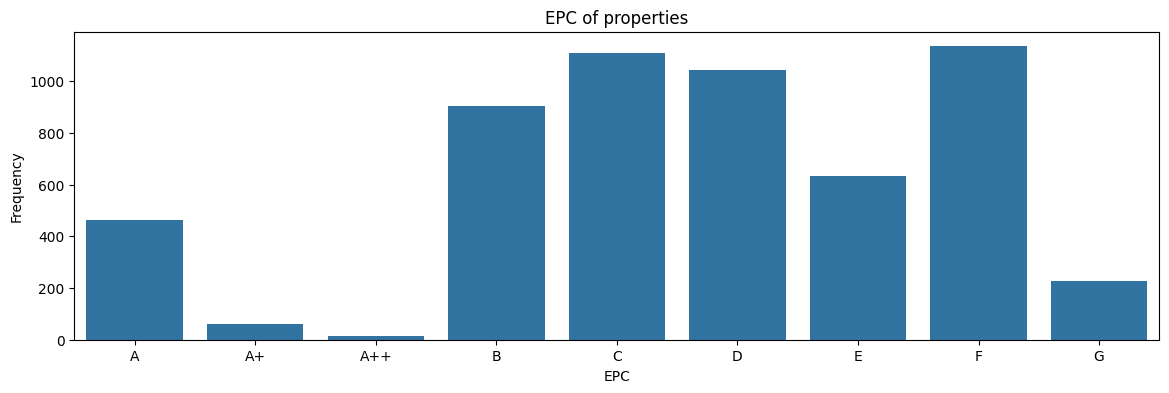

In [1338]:
#Detecting Outliers
frequency = df['epc'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('EPC of properties')
plt.xlabel('EPC')
plt.ylabel('Frequency')
plt.show()

In [1339]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['epc', 'count']

print(frequency_df)

   epc  count
0    F   1134
1    C   1107
2    D   1041
3    B    902
4    E    632
5    A    462
6    G    228
7   A+     60
8  A++     14


In [1340]:
#Dealing with missing values (Imputation)

df['epc'] = df['epc'].fillna(df['epc'].mode()[0])
frequency = df['epc'].value_counts()
frequency

#Missing is also a possibility here???

#df['epc'] = df['epc'].fillna('Missing')

epc
F      1406
C      1107
D      1041
B       902
E       632
A       462
G       228
A+       60
A++      14
Name: count, dtype: int64

In [1341]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)


Rare Values: epc
G      228
A+      60
A++     14
Name: count, dtype: int64


In [1342]:
#Assign the rare value to another value (EPC G only exist in Brussels and Wallonia)
category_map = {'A+': 'A', 'A++': 'A', 'G':'F'}
df['epc'] = df['epc'].map(category_map).fillna(df['epc'])

frequency = df['epc'].value_counts()
frequency

epc
F    1634
C    1107
D    1041
B     902
E     632
A     536
Name: count, dtype: int64